In [1]:
import pandas as pd

#데이터 불러오기 
df = pd.read_csv('news_comment_BTS.csv', encoding = 'UTF-8')

#데이터 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [2]:
#불필요한 문자 제거하기 
df['reply'] = df['reply'].str.replace('[^가-힣]',' ', regex = True)
df['reply'].head()

0                                    국보소년단            
1                                         아줌마가 들어도 좋더라
2    팩트체크  현재 빌보드           위  방탄소년단       위       ...
3              방탄소년단이 한국사람이라 너무 자랑스러워요    우리오래오래 함께하자 
4                  대단한      월드 클래스는 다르네   좋은 소식   응원해요
Name: reply, dtype: object

In [3]:
#kkma 만들기
import konlpy
kkma = konlpy.tag.Kkma()

In [4]:
#명사 추출 - apply() 활용
nouns = df['reply'].apply(kkma.nouns)
nouns

0                                        [국보, 국보소년단, 소년단]
1                                                   [아줌마]
2                   [팩트, 팩트체크, 체크, 보드, 위, 방탄, 방탄소년단, 소년단]
3              [방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]
4                                       [월드, 클래스, 소식, 응원]
                              ...                        
1195                                                   []
1196                                      [우리, 탄, 자랑, 사랑]
1197                                              [애, 군대]
1198                                     [군, 군면제급, 면제, 급]
1199    [자랑, 축하, 김, 김남, 남, 김석진, 민, 민윤기, 윤기, 정, 정호석, 호석...
Name: reply, Length: 1200, dtype: object

In [5]:
# 한 행에 한 단어가 들어가도록 구성
nouns = nouns.explode()
nouns

0          국보
0       국보소년단
0         소년단
1         아줌마
2          팩트
        ...  
1199      박지민
1199      김태형
1199        전
1199      전정국
1199       정국
Name: reply, Length: 9353, dtype: object

In [6]:
#데이터 프레임 만들기 
df_word = pd.DataFrame({'word' : nouns})

#글자 수 추가
df_word['count'] = df_word['word'].str.len()

#두 글자 이상 단어만 남기기
df_word = df_word.query('count >= 2')
df_word

,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0
...,...,...
1199,박지,2.0
1199,박지민,3.0
1199,김태형,3.0
1199,전정국,3.0


In [7]:
#빈도표 만들기
df_word = df_word.groupby('word', as_index = False) \
                 .agg(n = ('word', 'count')) \
                 .sort_values('n', ascending = False)
df_word

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
...,...,...
1136,실력있음,1
406,다음주면,1
1134,신화,1
1133,신중,1


In [8]:
#단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
813,보드,131
618,면제,125
233,군면제,78
225,군대,77
1364,우리,68


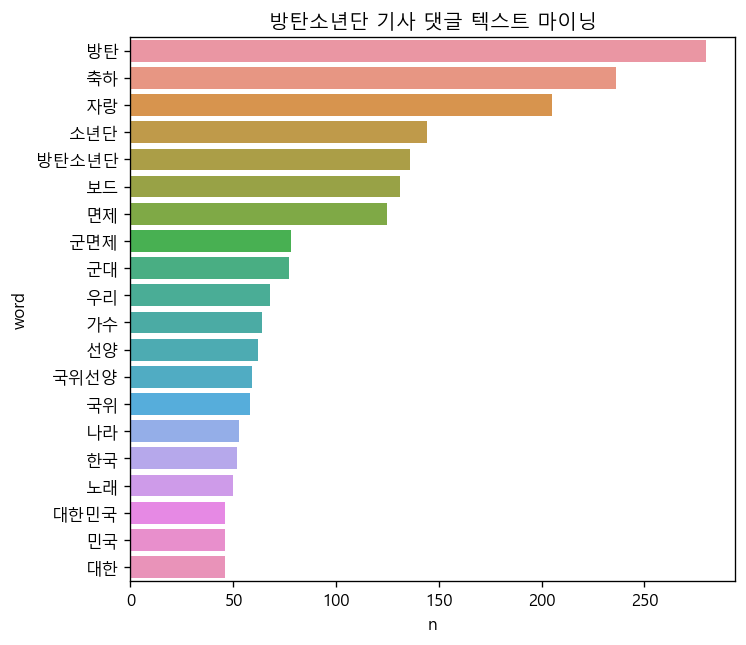

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family'     : 'Malgun Gothic'})   
plt.rcParams.update({'figure.dpi'      : '120'})   
plt.rcParams.update({'figure.figsize'  : [6.5, 6]})        
        
#막대 그래프 만들기
sns.barplot(data = top20, y = 'word', x = 'n')
plt.title('방탄소년단 기사 댓글 텍스트 마이닝')
plt.savefig('NewsCommentBTSTM.png', dpi=100)

In [20]:
#데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']

In [21]:
font = 'BMDOHYEON.ttf'

In [24]:
import PIL
icon = PIL.Image.open('cloud.png')

In [25]:
import numpy as np
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

In [40]:
from wordcloud import WordCloud
#wc 만들기
wc = WordCloud(random_state = 1234,
               font_path = font,
               width = 400,
               height = 400,
               background_color = 'white',
               mask = img,
               colormap = 'tab20b')

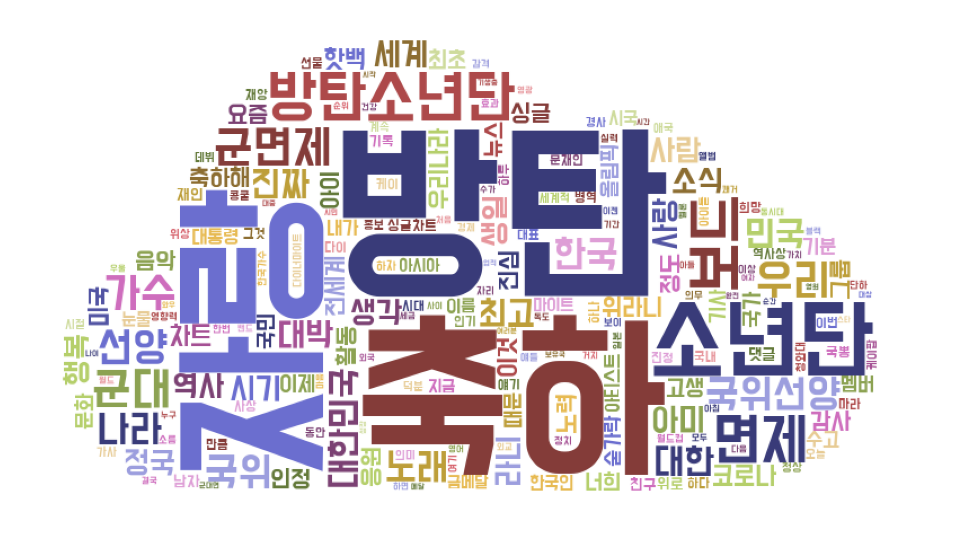

In [41]:
#워드 클라우드 만들기 
img_wordcloud = wc.generate_from_frequencies(dic_word)

#워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)
img_wordcloud.to_file('NewsCommentBTSWC.jpg')